In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.patches as mpatches
import matplotlib.font_manager

In [2]:
# Import NHE data
nhe2019 = pd.read_csv('NHE2019.csv', header=1)
nhe2019.head()

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total National Health Expenditures,"27,122","29,060","31,765","34,559","38,245","41,627","45,753","51,187","58,016",...,"2,589,719","2,676,415","2,783,097","2,859,517","3,008,305","3,177,724","3,324,528","3,465,878","3,629,690","3,795,384"
1,Out of pocket,"12,777","13,192","14,083","15,169","16,666","17,858","18,126","17,977","19,942",...,"301,397","310,229","323,063","330,410","339,918","353,807","367,277","374,480","388,789","406,507"
2,Health Insurance,"7,325","8,044","8,786","9,662","10,712","11,726","15,362","20,796","24,019",...,"1,832,637","1,902,581","1,971,512","2,021,347","2,155,186","2,293,270","2,405,571","2,506,130","2,633,777","2,752,837"
3,Private Health Insurance,"5,640","6,276","6,964","7,721","8,793","9,775","9,985","10,139","11,470",...,"820,111","851,112","877,856","881,300","926,855","981,644","1,039,609","1,091,138","1,152,174","1,195,146"
4,Medicare,-,-,-,-,-,-,"1,842","4,924","6,218",...,"519,536","544,596","568,368","588,919","617,572","647,835","675,768","704,716","749,140","799,356"


In [3]:
# Calculate total expenditure over time
totalExpenditure = nhe2019.iloc[0][1:].str.replace(",","").astype(int) # import row 0, remove commas, and convert to integer
outOfPocket = nhe2019.iloc[1][1:].str.replace(",","").astype(int)
healthInsurance = nhe2019.iloc[2][1:].str.replace(",","").astype(int)
yearsNHE = np.arange(1960, 2019+1)

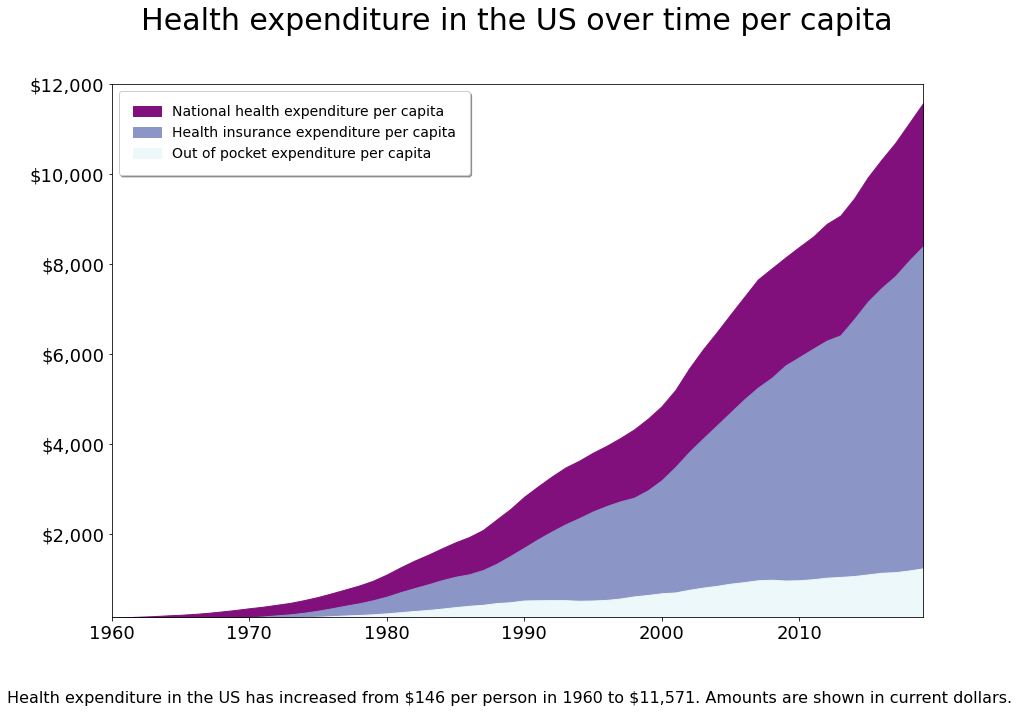

In [76]:
# Calculate expenditure per capita
population = nhe2019.iloc[36][1:].astype(int)
totalExpenditure_percap = totalExpenditure/population # convert from millions to thousands
healthInsurance_percap = healthInsurance/population
outOfPocket_percap = outOfPocket/population

# print(totalExpenditure_percap)

# Generate figure and specify properties
fig, ax = plt.subplots(figsize=(12,8))
plt.tight_layout()
ax.set_title("Health expenditure in the US over time per capita", fontsize=30, y=1.09)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xlim(1960,2019)
ax.set_ylim(150,12000)

# Plot data
ax.fill_between(yearsNHE, totalExpenditure_percap, color="#810f7c")
ax.fill_between(yearsNHE, healthInsurance_percap, color="#8c96c6")
ax.fill_between(yearsNHE, outOfPocket_percap, color="#edf8fb")

# Legend
purple = mpatches.Patch(color="#810f7c", label = 'National health expenditure per capita')
periwinkle = mpatches.Patch(color="#8c96c6", label = 'Health insurance expenditure per capita')
turquoise = mpatches.Patch(color="#edf8fb", label = 'Out of pocket expenditure per capita')
ax.legend(handles=[purple, periwinkle, turquoise], fontsize=14, loc=2, fancybox=True, borderpad=1, shadow=True)

# Caption
caption = 'Health expenditure in the US has increased from \$146 per person in 1960 to \$11,571. Amounts are shown in current dollars.'
plt.figtext(0.5,-0.1, caption, ha='center', fontsize=16)

# print(caption)

plt.show()
# plt.savefig('Health-expenditure.pdf') #, format='eps'

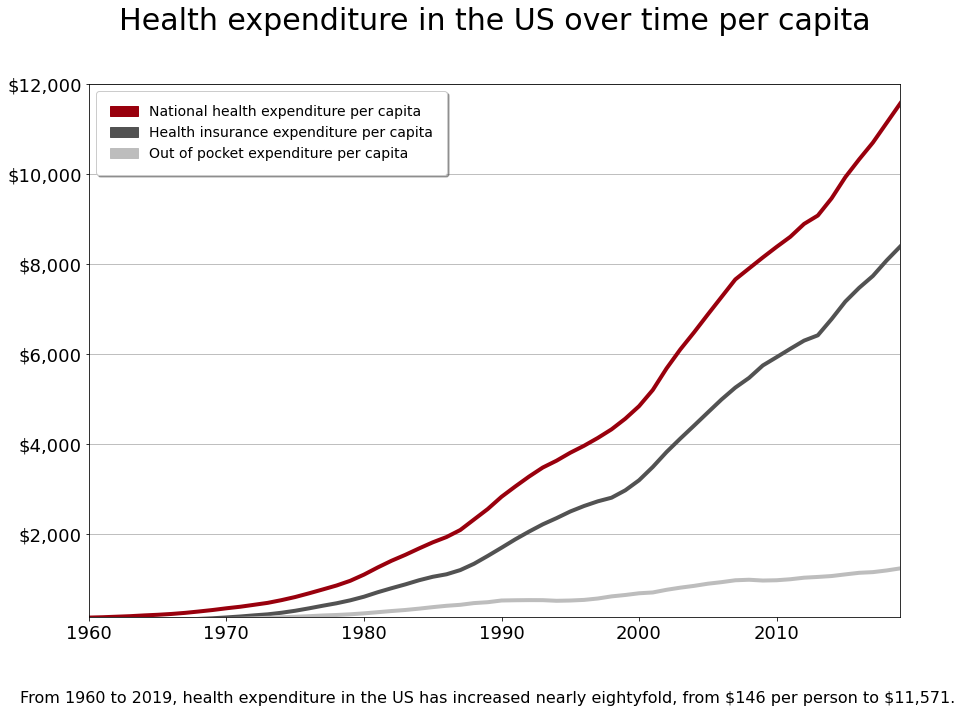

In [98]:
# same chart but with lines instead of fill

# Calculate expenditure per capita
population = nhe2019.iloc[36][1:].astype(int)
totalExpenditure_percap = totalExpenditure/population # convert from millions to thousands
healthInsurance_percap = healthInsurance/population
outOfPocket_percap = outOfPocket/population

# print(totalExpenditure_percap)

# Generate figure and specify properties
fig, ax = plt.subplots(figsize=(12,8))
plt.tight_layout()
ax.set_title("Health expenditure in the US over time per capita", fontsize=30, y=1.09)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xlim(1960,2019)
ax.set_ylim(150,12000)
ax.yaxis.grid()

# Plot data
ax.plot(yearsNHE, totalExpenditure_percap, color="#99000d", linewidth=4)
ax.plot(yearsNHE, healthInsurance_percap, color="#525252", linewidth=4)
ax.plot(yearsNHE, outOfPocket_percap, color="#bdbdbd", linewidth=4)

# Legend
purple = mpatches.Patch(color="#99000d", label = 'National health expenditure per capita')
periwinkle = mpatches.Patch(color="#525252", label = 'Health insurance expenditure per capita')
turquoise = mpatches.Patch(color="#bdbdbd", label = 'Out of pocket expenditure per capita')
ax.legend(handles=[purple, periwinkle, turquoise], fontsize=14, loc=2, fancybox=True, borderpad=1, shadow=True)

# Caption
caption = 'From 1960 to 2019, health expenditure in the US has increased nearly eightyfold, from \$146 per person to \$11,571.'
plt.figtext(0.5,-0.1, caption, ha='center', fontsize=16)

# print(caption)

plt.show()
# plt.savefig('Health-expenditure.pdf') #, format='eps'

In [5]:
# import OECD social expenditure data; in USD per capita
oecd_social = pd.read_csv("oecd_social.csv")
oecd_social_bycountry = oecd_social.groupby("LOCATION") #["Value"]
oecd_US = oecd_social_bycountry.get_group("USA")
yearsOECD = oecd_US["TIME"].astype(int)
social_US = oecd_US["Value"].astype(int)

# import OECD life expectancy
life_expect_birth = pd.read_csv("life_exp_oecd.csv")
life_expect_country = life_expect_birth.groupby("LOCATION")
life_expect_US = life_expect_country.get_group("USA")["TIME"].astype(int)

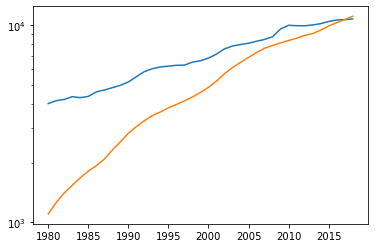

In [6]:
totalExpenditure_subset_percap = totalExpenditure_percap[20:-1] # take only years for which I have spending data

plt.plot(yearsOECD, social_US)
plt.plot(yearsOECD, totalExpenditure_subset_percap)
# plt.plot(yearsOECD, life_expect_US)
plt.yscale("log")
plt.show()
# plt.savefig("health-social.jpg")

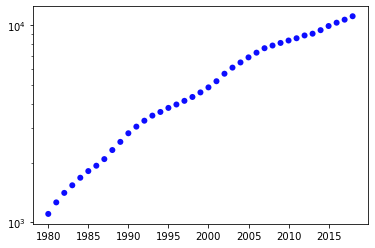

In [7]:
plt.scatter(life_expect_US, totalExpenditure_subset_percap,c="blue",alpha=0.95,edgecolors='none')
# plt.scatter(life_expect_US, social_US)
plt.yscale("log")
# plt.xscale("log")
# plt.savefig("health-social-log.jpg")